In [1]:
# 데이터 출처 : https://www.datamanim.com/dataset/ADPpb/00/31.html

# 31회 ADP 기출문제

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv
- 데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.


    id: unique id for each row    
    Gender: sex - male or female    
    Age: age    
    Height: height    
    Weight: weight    
    family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no    
    FAVC: Frequent consumption of high caloric food - yes or no     
    FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always    
    NCP: Number of main meals - 1, 2, 3, 4     
    CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always    
    SMOKE: Do you smoke - yes o no    
    CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l    
    SCC: Calories consumption monitoring - yes or no   
    FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5     
    TUE: Time using technology devices - 0 to 2, 3 to 5, >5    
    CALC: Consumption of alcohol - no, sometimes, frequently, always    
    MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking    
    BMI: Body mass index
    
    (종속변수)     
    NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

* id: 각 행의 고유 ID
* Gender: 성별 - 남성 또는 여성
* Age: 나이
* Height: 키
* Weight: 몸무게
* family_history_with_overweight: 가족 구성원이 과체중을 앓고 있거나 앓았는지 여부 - 예 또는 아니오
* FAVC: 고칼로리 음식의 빈번한 섭취 - 예 또는 아니오
* FCVC: 채소 섭취 빈도 - 전혀 안함, 가끔, 항상
* NCP: 주요 식사 횟수 - 1회, 2회, 3회, 4회
* CAEC: 식사 사이 음식 섭취 - 아니오, 가끔, 자주, 항상
* SMOKE: 흡연 여부 - 예 또는 아니오
* CH2O: 하루 물 섭취량 - 1리터 미만, 1~2리터, 2리터 이상
* SCC: 칼로리 섭취 모니터링 여부 - 예 또는 아니오
* FAF: 신체 활동 빈도 - 0회, 12회, 24회, 4~5회
* TUE: 기술 장치 사용 시간 - 02시간, 35시간, 5시간 이상
* CALC: 알코올 섭취 - 아니오, 가끔, 자주, 항상
* MTRANS: 사용된 교통 수단 - 자동차, 오토바이, 자전거, 대중교통, 걷기
* BMI: 체질량지수

(종속 변수)

* NObeyesdad: 비만 유형 - 과체중 1단계, 비만 1형, 비만 2형, 비만 3형



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['axes.unicode_minus'] = False

## 1-1  EDA & 결측치 및 이상치를 판단하고 설명하라

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv', encoding = 'cp949')

nul_count = df.isnull().sum()
nul_col = nul_count[nul_count>0]
print('설명변수 {}가 {}개의 결측치를 가지고 있습니다.'.format(nul_col.index.to_list(), nul_col.values))
print('결측치는 DataFrame의 fillna함수와 mode함수를 활용하여 해당 변수의 최빈값으로 대체합니다.')

nul_col = nul_col.index.tolist()[0]
df[nul_col] = df[nul_col].fillna(df[nul_col].mode()[0])


설명변수 ['SCC']가 [3]개의 결측치를 가지고 있습니다.
결측치는 DataFrame의 fillna함수와 mode함수를 활용하여 해당 변수의 최빈값으로 대체합니다.


단순 행번호를 나타내는 열을 제거합니다.
데이터에서 수치형 값을 갖는 특성은 ['Age', 'Height', 'Weight', 'NCP', 'BMI'] 입니다.

수치형 변수 중 이상치를 갖는 변수들을 찾고, 이상치들에 대해서는 IQR(InterQuantile Range)를 구하여 판정하며, 
1-quartile-0.15*IQR을 하한임계치로 정하여 이 것보다 낮은 경우 하한임계치로 대체,
3-quartile+0.15*IQR을 상한임계치로 정하여 이 것보다 높은 경우 상한임계치로 대체합니다.

설명변수 [Age]가 25240개의 데이터 중 2223개의 이상치를 가지고 있습니다. 이상치 상한임계값은 36.000, 하한임계값은 12.000 입니다.
설명변수 [Weight]가 25240개의 데이터 중 19개의 이상치를 가지고 있습니다. 이상치 상한임계값은 167.000, 하한임계값은 31.000 입니다.
설명변수 [NCP]가 25240개의 데이터 중 6213개의 이상치를 가지고 있습니다. 이상치 상한임계값은 3.000, 하한임계값은 3.000 입니다.


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

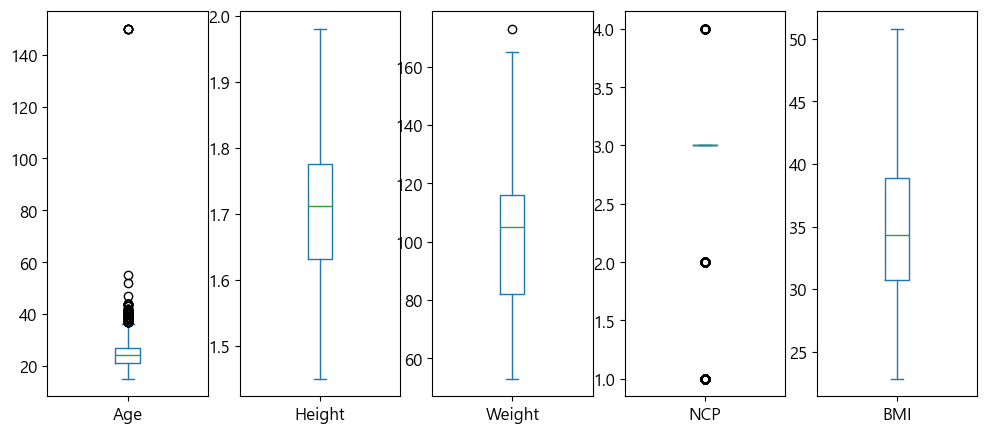

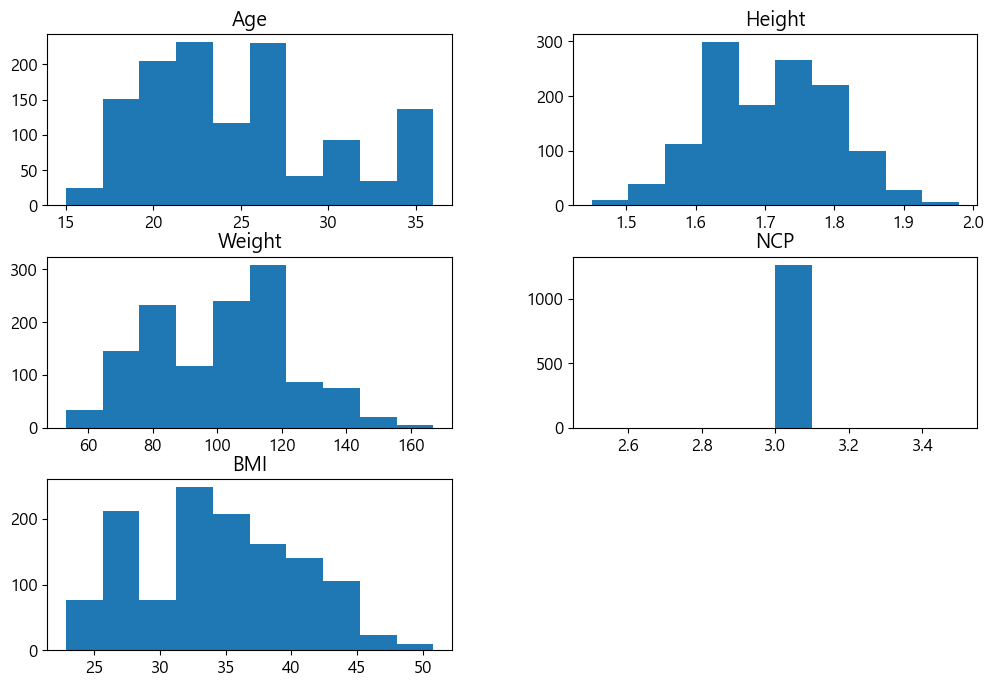

In [4]:
data = df.drop(['Unnamed: 0'], axis=1)
print('단순 행번호를 나타내는 열을 제거합니다.')

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(f'데이터에서 수치형 값을 갖는 특성은 {num_cols.tolist()} 입니다.' )
print('''
수치형 변수 중 이상치를 갖는 변수들을 찾고, 이상치들에 대해서는 IQR(InterQuantile Range)를 구하여 판정하며, 
1-quartile-0.15*IQR을 하한임계치로 정하여 이 것보다 낮은 경우 하한임계치로 대체,
3-quartile+0.15*IQR을 상한임계치로 정하여 이 것보다 높은 경우 상한임계치로 대체합니다.
''')

figure, ax = plt.subplots(1, 5)
for a, col in zip(ax, num_cols):
    data[col].plot(kind='box', ax=a)
    IQR = data[col].quantile(0.75)-data[col].quantile(0.25) 
    up_bound = data[col].quantile(0.75) + IQR*1.5
    lo_bound = data[col].quantile(0.25) - IQR*1.5
    up_excd = data[ data[col] > up_bound ].size
    lo_excd = data[ data[col] < lo_bound ].size
    data[col].clip(lo_bound, up_bound, inplace=True)
    if up_excd+lo_excd > 0:
        print('설명변수 [{}]가 {}개의 데이터 중 {}개의 이상치를 가지고 있습니다. 이상치 상한임계값은 {:.3f}, 하한임계값은 {:.3f} 입니다.'.format(col, df.size, up_excd+lo_excd, up_bound, lo_bound))

data.hist(grid=False, figsize=(12, 8))

In [5]:
nom_df = data.drop(num_cols, axis=1)
print(f'문자형 변수 목록은 {nom_df.columns.tolist()} 과 같습니다.')

cat_cols = nom_df.drop('id', axis=1).columns
for col in cat_cols:
    print(data[col].value_counts())

print('문자형 변수 중 [id] 특성을 제외한 특성은 모두 범주형 변수입니다. ')

문자형 변수 목록은 ['id', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'] 과 같습니다.
Gender
male      636
female    626
Name: count, dtype: int64
family_history_with_overweight
yes    1173
no       89
Name: count, dtype: int64
FAVC
yes    1221
no       41
Name: count, dtype: int64
FCVC
always       630
sometimes    580
never         52
Name: count, dtype: int64
CAEC
sometimes     1190
no              37
frequently      22
always          13
Name: count, dtype: int64
SMOKE
no     1237
yes      25
Name: count, dtype: int64
CH2O
between 1 and 2 l    618
more than 2 l        373
less than a liter    271
Name: count, dtype: int64
SCC
no     1222
yes      40
Name: count, dtype: int64
FAF
1 to 2    482
0         471
2 to 4    260
4 to 5     49
Name: count, dtype: int64
TUE
0 to 2    615
3 to 5    521
>5        126
Name: count, dtype: int64
CALC
sometimes     943
no            287
frequently     32
Name: count, dtyp

## 1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

In [6]:
print('''
    데이터 전처리 기법은 이상치를 처리하는 기법, 클래스 불균형을 처리하는 기법, 머신러닝 모델 성능을 높이기 위해 데이터를 변환하는 기법, 특성이 너무 많은 경우 특성을 제외시키거나 추출하는 특성 엔지니어링 등이 있다.
    이 중 머신러닝 모델 적용 및 성능향상을 위해 적용하는 데이터 변환 기법은 one-hot 인코딩과 스케일링 기법 2가지에 대해 설명한다.
      1. one-hot 인코딩
        문자형의 범주형 변수의 경우 머신러닝에 적용할 수 없기 때문에, 이를 수치화하는 작업이 필요하다. 
        하지만 수치화 시 1, 2, 3 등 서열척도가 바뀌면 서열의 크기가 모델링에 영향을 주게 되므로,
        n개의 범주가 존재할 경우, 각 범주에 해당하는 n-1 개의 더미변수를 추가하고 0 아니면 1의 값을 할당하여 범주를 나타내는 것이 one-hot 인코딩이다.
      2. 스케일링
        수치형 특성이 여러 개인 경우, 각각의 단위가 다르다면 해당 변수 내의 편차의 중요성을 균일하게 맞출 필요가 있다.
        그렇지 않으면 수치가 큰 단위의 특성의 경우 중요도가 더 높게 평가되어, 변수 내에서는 유의미한 편차가 아님에도 타 변수에 비해 큰 값이어서 더 중요한 취급을 받게 된다.
        따라서 표준화 스케일링을 통해 0과 1 사이의 값들로 표준화하는 것이 모델 성능을 높이는 방법이다.
      ''')


    데이터 전처리 기법은 이상치를 처리하는 기법, 클래스 불균형을 처리하는 기법, 머신러닝 모델 성능을 높이기 위해 데이터를 변환하는 기법, 특성이 너무 많은 경우 특성을 제외시키거나 추출하는 특성 엔지니어링 등이 있다.
    이 중 머신러닝 모델 적용 및 성능향상을 위해 적용하는 데이터 변환 기법은 one-hot 인코딩과 스케일링 기법 2가지에 대해 설명한다.
      1. one-hot 인코딩
        문자형의 범주형 변수의 경우 머신러닝에 적용할 수 없기 때문에, 이를 수치화하는 작업이 필요하다. 
        하지만 수치화 시 1, 2, 3 등 서열척도가 바뀌면 서열의 크기가 모델링에 영향을 주게 되므로,
        n개의 범주가 존재할 경우, 각 범주에 해당하는 n-1 개의 더미변수를 추가하고 0 아니면 1의 값을 할당하여 범주를 나타내는 것이 one-hot 인코딩이다.
      2. 스케일링
        수치형 특성이 여러 개인 경우, 각각의 단위가 다르다면 해당 변수 내의 편차의 중요성을 균일하게 맞출 필요가 있다.
        그렇지 않으면 수치가 큰 단위의 특성의 경우 중요도가 더 높게 평가되어, 변수 내에서는 유의미한 편차가 아님에도 타 변수에 비해 큰 값이어서 더 중요한 취급을 받게 된다.
        따라서 표준화 스케일링을 통해 0과 1 사이의 값들로 표준화하는 것이 모델 성능을 높이는 방법이다.
      


In [7]:
cat_cols = nom_df.drop('id', axis=1).columns.tolist()
cat_cols.remove('NObeyesdad') 

print('수치형 변수의 목록 :', num_cols)
print('범주형 변수의 목록 :', cat_cols)

X = pd.concat([data[num_cols], pd.get_dummies(data[cat_cols], drop_first=True)], axis=1)
y = data.NObeyesdad.map({'obesity_type_i':2, 'obesity_type_ii':3, 'obesity_type_iii':4, 'overweight_level_i':1})                      

수치형 변수의 목록 : Index(['Age', 'Height', 'Weight', 'NCP', 'BMI'], dtype='object')
범주형 변수의 목록 : ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


## 1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

#

<Axes: >

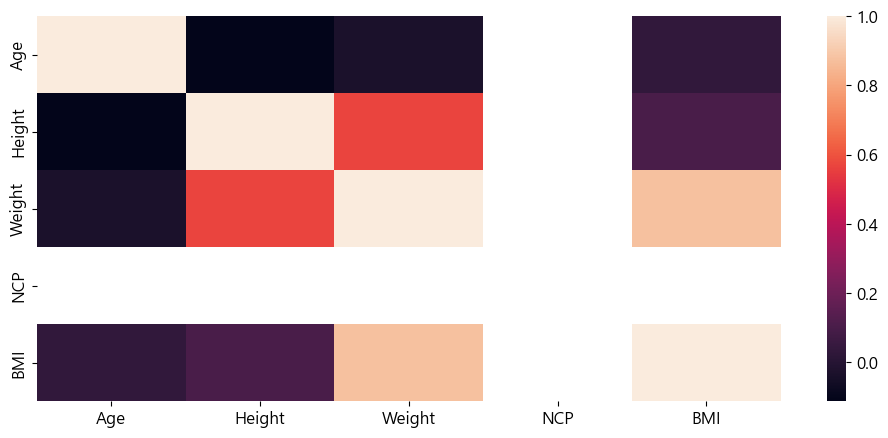

In [8]:
import seaborn as sns
sns.heatmap(data[num_cols].corr())

In [9]:
print('''FAF는 신체활동빈도이고 TUE는 기술장치사용횟수를 의미한다. FAF는 비만 정도에 반비례할 것으로 기대되고, TUE는 비만 정도에 비례할 것으로 기대된다. 
      FAF는 낮고 TUE는 높을 때 비만 가능성이 높아지고, 반대상황에 낮을 것으로 기대되므로, 이를 확인하기 위해 TUE / FAF 특성을 파생변수 FAT로 추가한다.
      이를 위해 FAF는 {'0':1, '1 to 2':2, '2 to 4':3, '4 to 5':4}로 인코딩하고 TUE는 {'0 to 2':1, '3 to 5':2, '>5':3}으로 인코딩한다.
      ''')

tempFAF = data.FAF.map({'0':1, '1 to 2':2, '2 to 4':3, '4 to 5':4});
tempTUE = data.TUE.map({'0 to 2':1, '3 to 5':2, '>5':3})
data['FAT'] = tempTUE / tempFAF

data[['FAT', 'TUE', 'FAF']].head()

X['FAT'] = data.FAT

FAF는 신체활동빈도이고 TUE는 기술장치사용횟수를 의미한다. FAF는 비만 정도에 반비례할 것으로 기대되고, TUE는 비만 정도에 비례할 것으로 기대된다. 
      FAF는 낮고 TUE는 높을 때 비만 가능성이 높아지고, 반대상황에 낮을 것으로 기대되므로, 이를 확인하기 위해 TUE / FAF 특성을 파생변수 FAT로 추가한다.
      이를 위해 FAF는 {'0':1, '1 to 2':2, '2 to 4':3, '4 to 5':4}로 인코딩하고 TUE는 {'0 to 2':1, '3 to 5':2, '>5':3}으로 인코딩한다.
      


## 2-1 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

In [10]:
print('''
0. 로지스틱회귀
1. 결정트리.
2. SVM
3. KNN을 사용하여 분류해보았다.
''')


0. 로지스틱회귀
1. 결정트리.
2. SVM
3. KNN을 사용하여 분류해보았다.



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)

model_lr = LogisticRegression(C=1, max_iter=2000, penalty='l2', solver='lbfgs')
model_lr.fit(X_train, y_train)
score_lr = model_lr.score(X_test, y_test)
print('LogisticRegression\'s score is {:.3f}'.format(score_lr))

model_svm = SVC(C=10, degree=1, gamma=0.1, kernel='linear')
model_svm.fit(X_train, y_train)
score_svm = model_svm.score(X_test, y_test)
print('SVM\'s score is {:.3f}'.format(score_svm))

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
model_dt = DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
model_dt.fit(X_train, y_train)
score_dt = model_dt.score(X_test, y_test)
print('DecisionTreee\'s score is {:.3f}'.format(score_dt) )

model_knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='euclidean')
model_knn.fit(X_train, y_train)
score_knn = model_knn.score(X_test, y_test)
print('KNeighborClassifier\'s score is {:.3f}'.format(score_knn))


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression's score is 0.981
SVM's score is 0.984
DecisionTreee's score is 0.962
KNeighborClassifier's score is 0.991


In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

fold_lr = StratifiedKFold(n_splits=5)
grid_lr = { 'penalty' : ['l1', 'l2'],
            'C' : [0.5, 1, 1.5],
            'solver' : ['lbfgs','liblinear'],
            'max_iter' : [2000, 2500, 3000]}
model_lr = LogisticRegression()

cv_lr = GridSearchCV(model_lr, param_grid=grid_lr, cv=fold_lr)
cv_lr.fit(X, y)
print('LogisticRegression''s best score is {:.3f}'.format(cv_lr.best_score_))
print(f"LogisticRegression''s best params {cv_lr.best_params_}")



fold_svm = StratifiedKFold(n_splits=5)
grid_svm = { 'degree': [1, 2, 3],                   # 'poly' 커널에서 차수 조절
             'C': [0.1, 1, 10],                     # 에러율 조절 (커지면 과적합)
             'gamma': [0.1, 1],                 # 학습정도 조절 (커지면 과적합)
             'kernel': ['linear', 'rbf', 'poly']}   # 경계면의 곡선화   
model_svm = SVC()

cv_svm = GridSearchCV(model_svm, param_grid=grid_svm, cv=fold_svm)
cv_svm.fit(X, y)
print('LogisticRegression''s best score is {:.3f}'.format(cv_svm.best_score_))
print(f"LogisticRegression''s best params {cv_svm.best_params_}")



fold_dt = StratifiedKFold(n_splits=5)
grid_dt = {     'max_features': ['auto', 'sqrt'],
                'max_depth': [5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}
model_dt = DecisionTreeClassifier()

cv_dt = GridSearchCV(model_dt, param_grid=grid_dt, cv=fold_dt)
cv_dt.fit(X, y)

print('DecisionTreeClassifier''s best score is {:.3f}'.format(cv_dt.best_score_))
print(f"DecisionTreeClassifier''s best params {cv_dt.best_params_}")



fold_knn = StratifiedKFold(n_splits=5)
grid_knn = {'n_neighbors':[3, 4, 5], 
            'weights':["distance", 'uniform'], 
            'metric':["euclidean", 'minkowski']}
model_knn = KNeighborsClassifier()

cv_knn = GridSearchCV(model_knn, param_grid=grid_knn, cv=fold_knn)
cv_knn.fit(X, y)

print('KNN\'s best score is {:.3f}'.format(cv_knn.best_score_))
print(f"KNN\''s best params {cv_knn.best_params_}")

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depreca

LogisticRegressions best score is 0.992
LogisticRegression''s best params {'C': 1, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegressions best score is 0.994
LogisticRegression''s best params {'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

DecisionTreeClassifiers best score is 0.975
DecisionTreeClassifier''s best params {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
KNN's best score is 0.994
KNN''s best params {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}


In [13]:
fold_lr = StratifiedKFold(n_splits=5)
grid_lr = { 'penalty' : ['l1', 'l2'],
            'C' : [0.5, 1, 1.5],
            'solver' : ['lbfgs','liblinear'],
            'max_iter' : [2000, 2500, 3000]}
model_lr = LogisticRegression()

cv_lr = GridSearchCV(model_lr, param_grid=grid_lr, cv=fold_lr)
cv_lr.fit(X, y)
print('LogisticRegression\'s best score is {:.3f}'.format(cv_lr.best_score_))
print(f"LogisticRegression\'s best params {cv_lr.best_params_}")

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depreca

LogisticRegression's best score is 0.992
LogisticRegression's best params {'C': 1, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
print('knn의 정확도가 0.99가 나와서 가장 높은 정확도를 보였고 그 다음으로 결정트리의 정확도가 0.98로 높았으며, svm이 세 모델 중에서 성능은 가장 낮은 것으로 확인되었다.')
print('따라서 knn모델이 가장 높은 정확도를 가지고 있으므로 가장 좋은 모델이라고 판단할 수 있다.')

knn의 정확도가 0.99가 나와서 가장 높은 정확도를 보였고 그 다음으로 결정트리의 정확도가 0.98로 높았으며, svm이 세 모델 중에서 성능은 가장 낮은 것으로 확인되었다.
따라서 knn모델이 가장 높은 정확도를 가지고 있으므로 가장 좋은 모델이라고 판단할 수 있다.


## 2-2 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

In [15]:
from sklearn.metrics import classification_report

fold_dt = StratifiedKFold(n_splits=5)
grid_dt = {     'max_features': ['auto', 'sqrt'],
                'max_depth': [5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}
model_dt = DecisionTreeClassifier()

cv_dt = GridSearchCV(model_dt, param_grid=grid_dt, cv=fold_dt)
cv_dt.fit(X, y)

print('DecisionTreeClassifier''s best score is {:.3f}'.format(cv_dt.best_score_))
print(f"DecisionTreeClassifier''s best params {cv_dt.best_params_}")

model_dt2 = DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
model_dt2.fit(X_train, y_train)
score_dt2 = model_dt2.score(X_test, y_test)
print('Final score is {:.3f}'.format(score_dt2))

print(classification_report(y_test, model_dt2.predict(X_test)))

y = data.NObeyesdad.map({'obesity_type_i':2, 'obesity_type_ii':3, 'obesity_type_iii':4, 'overweight_level_i':1})    

print('''
전체적인 성능(Accuracy)는 0.977로 매우 높게 나왔다.
      각 클래별 정밀도를 보면 3번, 즉 obesity_type_ii으로 예측한 경우 맞는 확률이 가장 낮은 편이다. 
      각 클래별 재현율을 보면 4번, 즉 obesity_type_iii의 경우, 가장 잘 못찾아낸다.
      즉 obesity_type_iii에 해당하는 데이터에 대해 오답율이 높았다고 할 수 있다.
      ''')


DecisionTreeClassifiers best score is 0.983
DecisionTreeClassifier''s best params {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Final score is 0.962
              precision    recall  f1-score   support

           1       0.97      0.95      0.96        73
           2       0.94      0.94      0.94        83
           3       0.95      0.97      0.96        80
           4       0.99      0.99      0.99        80

    accuracy                           0.96       316
   macro avg       0.96      0.96      0.96       316
weighted avg       0.96      0.96      0.96       316


전체적인 성능(Accuracy)는 0.977로 매우 높게 나왔다.
      각 클래별 정밀도를 보면 3번, 즉 obesity_type_ii으로 예측한 경우 맞는 확률이 가장 낮은 편이다. 
      각 클래별 재현율을 보면 4번, 즉 obesity_type_iii의 경우, 가장 잘 못찾아낸다.
      즉 obesity_type_iii에 해당하는 데이터에 대해 오답율이 높았다고 할 수 있다.
      


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

## 2-3 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

In [16]:
from sklearn.ensemble import VotingClassifier

model_svm = SVC(probability= True)
ensemble_model = VotingClassifier(estimators = [('knn', model_knn), ('svm', model_svm), ('dt' , model_dt), ('lr' , model_lr)], voting = 'soft')

ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('앙상블(보팅) 정확도 :', accuracy)

앙상블(보팅) 정확도 : 0.9810126582278481


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print('2-2의 모델과 소프트 보팅을 사용한 2-3의 결과물을 비교한 결과 2-2의 모델이 더 좋은 성능을 내는 것을 확인할 수 있다.')

2-2의 모델과 소프트 보팅을 사용한 2-3의 결과물을 비교한 결과 2-2의 모델이 더 좋은 성능을 내는 것을 확인할 수 있다.


## 3-2 하나의 모델을 선정하여 Drop-Column Importance 방법으로 특성의 중요도(feature importance)를 산출하여 제시

In [18]:
print('''
      Drop-Column Importance 방법은 하나의 Feature를 제거했을 때의 모델 성능이, 전체 특성을 모두 사용한 모델 대비 얼마나 떨어지는지 확인하는 과정을 사용한다.
      이 과정에서 가장 많이 떨어지는 특성은 가장 중요한 특성이라고 판단할 수 있고, 가장 적게 떨어지는 특성은 가장 덜 중요한 특성이라고 판단할 수 있다.
      ''')


      Drop-Column Importance 방법은 하나의 Feature를 제거했을 때의 모델 성능이, 전체 특성을 모두 사용한 모델 대비 얼마나 떨어지는지 확인하는 과정을 사용한다.
      이 과정에서 가장 많이 떨어지는 특성은 가장 중요한 특성이라고 판단할 수 있고, 가장 적게 떨어지는 특성은 가장 덜 중요한 특성이라고 판단할 수 있다.
      


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

tempFAF = data.FAF.map({'0':1, '1 to 2':2, '2 to 4':3, '4 to 5':4});
tempTUE = data.TUE.map({'0 to 2':1, '3 to 5':2, '>5':3})
data['FAT'] = tempTUE / tempFAF
X['FAT'] = data.FAT

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

model = SVC(C=10, kernel='linear', gamma=0.1)
model.fit(X_train, y_train)
score_base = model.score(X_test, y_test)
print('Base score is {:.3f}'.format(score_base))

columns = X.columns
drop_df = pd.DataFrame({'drop_importance':[]})

for col in columns:
    X2= X.drop(col, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X2, y)
    model = SVC(C=10, kernel='linear', gamma=0.1)
    model.fit(X_train,y_train)
    score_drop = model.score(X_test, y_test)
    drop_df.loc[col] = score_base - score_drop

drop_df.sort_values(by='drop_importance', ascending=False, inplace=True)
print(drop_df)

print("""
      위 표에 나타난 바와 같이 CAEC_no, Weight, MTRANCE_walking 등은 학습 시 제외시키면 성능의 차이가 크게 발생하는, 중요한 특성이다.
      반면, MTRANS_bike, FAF_2 to 4, NCP 등은 학습 성능을 떨어뜨리거나, 학습 성능에 영향을 주지 못하는 중요하지 않은 특성으로 밝혀졌다.
      """)


Base score is 0.994


                                    drop_importance
BMI                                        0.028481
FAT                                        0.015823
FAF_4 to 5                                 0.015823
family_history_with_overweight_yes         0.012658
FAVC_yes                                   0.012658
FCVC_never                                 0.012658
CH2O_more than 2 l                         0.009494
MTRANS_walking                             0.009494
MTRANS_bike                                0.009494
SMOKE_yes                                  0.009494
MTRANS_public_transportation               0.006329
MTRANS_motorbike                           0.006329
CALC_no                                    0.006329
TUE_3 to 5                                 0.006329
FAF_1 to 2                                 0.006329
CH2O_less than a liter                     0.006329
CAEC_sometimes                             0.006329
Gender_male                                0.006329
NCP         

## 데이터 설명
- 데이터 출처 : 자체제작
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
- 데이터 설명 : 중고등학생 건강검진 데이터

## 4-1 아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 적정 체중여부에 대한 빈도 표를 만들어라

> bmi 계산
    - Bmi = 몸무게(kg)/(키(m)**2)   

> 만나이 구하기
    - 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라
    - 윤년 등은 고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다


> 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)     
    17세 남자 : 21.03이상 23.21 미만   
    17세 여자 : 20.03이상 22.39 미만    
    16세 남자 : 21.18이상 23.45 미만   
    16세 여자 : 19.61이상 21.74 미만       

In [68]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
df.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성


In [69]:
data = df.copy()

# 우선 BMI열을 추가하자
data['BMI'] = data.weight / ((data.키/100)**2)

# 만나이를 구하자.
import datetime as dt
data['생년월일_dt'] = data.생년월일.astype('string').astype('datetime64[ns]')
data['건강검진일_dt'] = data.건강검진일.apply(lambda x: dt.datetime.strptime(x, '%Y_%m_%d'))

full_age = dt.timedelta(days=365*16+364)
data['adult'] = (data['건강검진일_dt'] - data['생년월일_dt']).dt.days > 365*16+364

# 적정 체중 여부를 구하자.
data.loc[(data.adult == True) & (data.성별 == '남성') & (data.BMI >= 21.03) & (data.BMI < 23.21), '적정체중' ] = True
data.loc[(data.adult == True) & (data.성별 == '여성') & (data.BMI >= 20.03) & (data.BMI < 22.39), '적정체중' ] = True
data.loc[(data.adult == False) & (data.성별 == '남성') & (data.BMI >= 21.18) & (data.BMI < 23.45), '적정체중' ] = True
data.loc[(data.adult == False) & (data.성별 == '여성') & (data.BMI >= 19.61) & (data.BMI < 21.74), '적정체중' ] = True

data.적정체중 = data.적정체중.fillna(False)


C:\Users\lsel\AppData\Local\Temp\ipykernel_10544\4184826015.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.적정체중 = data.적정체중.fillna(False)


## 4-2 4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

In [25]:
# 이 문제는 명목척도를 갖는 2개 이상 독립표본에 대한 가설검정이며, 이 경우 독립성 검정을 시행한다.
# 테이블의 구성은 아래와 같다. 이 같은 테이블을 구성하기 위해 crosstab을 활용한다.
#           공학여부Y   공학여부N
# 적정체중Y
# 적정체중N 
# chi2 독립성검정에서 귀무가설은 독립적이다. / 대립가설은 독립적이지 않다. 
# 따라서 유의확률이 유의수준보다 낮을 때 독립적이지 않은 것으로, 즉 상관관계가 있는 것으로 판단다.

from scipy.stats import chi2_contingency

cols = ['공학여부', '아침식사여부', '일주일운동시간', '채소섭취정도', '수면시간', '성별']

result = []

for col in cols:
    cont_table = pd.crosstab(data[col], data.적정체중)
    chi2, p, _ , _ = chi2_contingency(cont_table)
    result.append((col, chi2, p))

result = pd.DataFrame(result, columns=['검정대상', 'chi2통계량', '유의확률'])
print(result)

print('''
5% 유의수준에서 공학여부와 채소섭취정도는 적정체중과 독립적이지 않다.
''')

      검정대상     chi2통계량      유의확률
0     공학여부    4.542368  0.033066
1   아침식사여부    0.152151  0.696488
2  일주일운동시간  115.745222  0.119871
3   채소섭취정도   10.143194  0.038083
4     수면시간   46.992431  0.554877
5       성별    0.002345  0.961379

5% 유의수준에서 공학여부와 채소섭취정도는 적정체중과 독립적이지 않다.



In [ ]:
print('''
검정 결과 p-value값이 0.05이상이면 해당 변수는 적정체중여부와 독립적이고
0.05이하이면 독립적이지 않다고 판단할 수 있다.

따라서 결과를 확인해보면 공학여부, 채소섭취정도는 독립적이지 않은 변수이며
나머지 컬럼, 즉 아침식사여부, 일주일운동시간, 수면시간, 성별은 적정 체중여부와 독립적인 것을 확인할 수 있었다.
    '''
)


검정 결과 p-value값이 0.05이상이면 해당 변수는 적정체중여부와 독립적이고
0.05이하이면 독립적이지 않다고 판단할 수 있다.

따라서 결과를 확인해보면 공학여부, 채소섭취정도는 독립적이지 않은 변수이며
나머지 컬럼, 즉 아침식사여부, 일주일운동시간, 수면시간, 성별은 적정 체중여부와 독립적인 것을 확인할 수 있었다.
    


## 4-3 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)
> 로지스틱회귀 모델은 오즈비를 구하라
> xgb의 경우 각 피쳐중요도를 확인하고 예측에 영향을 가장 미치는 변수를 확인하라

In [121]:
from xgboost import XGBClassifier
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')

X = df[['공학여부', '채소섭취정도']]
y = data.적정체중

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression(C=1, max_iter=4000)
lr.fit(X_train, y_train)
print('LogisticRegression\'s score is {:.3f}'.format(lr.score(X_test, y_test)))

xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.05, booster='gbtree')
xgb.fit(X_train, y_train)
print('XGBoost\'s score is {:.3f}'.format(xgb.score(X_test, y_test)))

print(X_train.info())
print(X_test.info())
print(y_train.info())
print(y_test.info())

LogisticRegression's score is 0.601
XGBoost's score is 0.601
<class 'pandas.core.frame.DataFrame'>
Index: 5100 entries, 3672 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   공학여부    5100 non-null   int64
 1   채소섭취정도  5100 non-null   int64
dtypes: int64(2)
memory usage: 119.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1701 entries, 2283 to 1549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   공학여부    1701 non-null   int64
 1   채소섭취정도  1701 non-null   int64
dtypes: int64(2)
memory usage: 39.9 KB
None
<class 'pandas.core.series.Series'>
Index: 5100 entries, 3672 to 310
Series name: 적정체중
Non-Null Count  Dtype
--------------  -----
5100 non-null   bool 
dtypes: bool(1)
memory usage: 44.8 KB
None
<class 'pandas.core.series.Series'>
Index: 1701 entries, 2283 to 1549
Series name: 적정체중
Non-Null Count  Dtype
--------------  -----
1701 non-null   bool 
dtypes: bool(

In [114]:
print(f'LogisticRegression\'s coefficents are {lr.coef_} for feautures {lr.feature_names_in_}')
for coef, feat in zip(lr.coef_[0], lr.feature_names_in_):
    print('{}의 오즈비는 {:.3f}이다.'.format(feat, np.exp(coef)))

print(f'XGBoost 학습을 통한 특성별 중요도는 아래와 같다. {xgb.feature_importances_} for feautures {xgb.feature_names_in_}')

LogisticRegression's coefficents are [[0.10955227 0.01156246]] for feautures ['공학여부' '채소섭취정도']
공학여부의 오즈비는 1.116이다.
채소섭취정도의 오즈비는 1.012이다.
XGBoost 학습을 통한 특성별 중요도는 아래와 같다. [0.657848   0.34215203] for feautures ['공학여부' '채소섭취정도']


## 4-4 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라

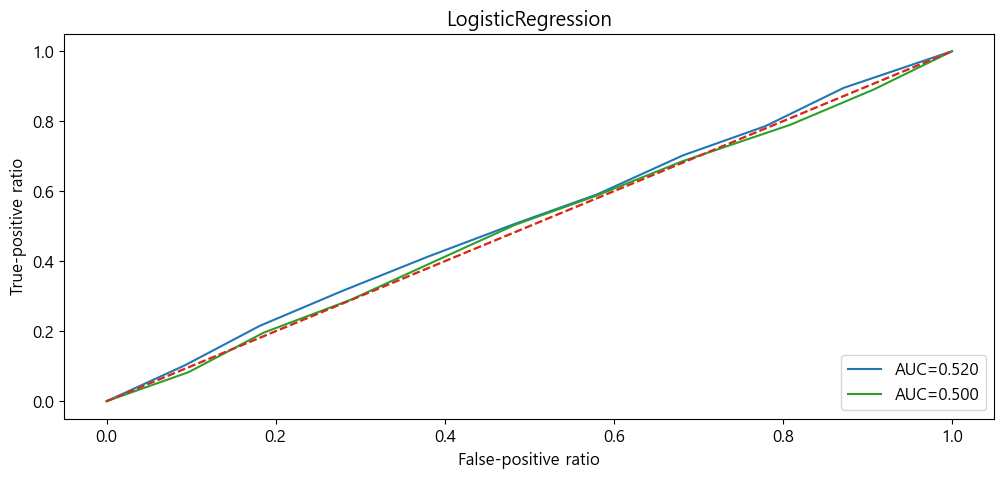

In [142]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

def plot_roc_curve(ax, name, y_true, y):
    fpr, tpr, thres = roc_curve(y_true, y)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, label='AUC={:.3f}'.format(roc_auc))
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlabel('False-positive ratio')
    ax.set_ylabel('True-positive ratio')
    ax.set_title(name)
    ax.legend(loc='lower right')

figure, ax = plt.subplots(1,1)
plot_roc_curve(ax, 'XGB', y_test, xgb.predict_proba(X_test)[:,1])
plot_roc_curve(ax, 'LogisticRegression', y_test, lr.predict_proba(X_test)[:,1])

plt.show()




# 통계 (40점)

## 5. 평균이 $\theta$이고 분산이 100인 정규분포의 사전분포가 (100, 256)일때 120의 값을 가지는 데이터가 있을 경우 사후평균은? (5점)
무게가 N($\theta$, 100)인 정규분포에서, 사전분포는 N(100, 256)이다. 제품의 무게가 120kg일 때, 사후분포의 평균을 구하라 (단, 소수점 3째자리까지 구하라)

In [145]:
# N(100, 256) --> 관측치 120 --> N(theta, 100) 여기서 theta는?
mu_pr = 100
va_pr = 256

obs = 120

#mu_or = theta
va_po = 100


# 사후분산*사전평균 + 사전분산*관측치 / 사후분산+사전분산
theta = (va_po*mu_pr + va_pr*120) / (va_pr + va_po)
round(theta, 3)


114.382

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
- 데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
- 종속변수 : Sales

## 6-1 회귀 모델링 후 유의하지 않는변수 파악 (15점)

In [146]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [150]:
import statsmodels.api as smapi

y = df['Sales']
X = df[['TV','Radio','Newspaper']]
X = smapi.add_constant(X)

model = smapi.OLS(y, X)
fitted  = model.fit()
fitted.summary()

print('''
    회귀분석 결과 유의수준 5%에서 Newspaper는 유의미하지 않은 것으로 확인되었다.
      TV와 Radio는 Sales를 예측하는데 유의한 회귀계수로 확인되었다.
      ''')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           8.13e-99
Time:                        22:16:15   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6-2 변수 선택시 먼저 제거 될 변수 및 근거 제시

In [ ]:
print('''
pvalue 값이 0.05이하일 때 유의미한 변수로 진단할 수 있다
현재 Newspaper를 제외한 나머지 변수들은 유의미한 것을 알 수 있고, 같은 이유로 Newspaper가 변수 선택시 먼저 제거해야함을 알 수 있습니다
''')


pvalue 값이 0.05이하일 때 유의미한 변수로 진단할 수 있다
현재 Newspaper를 제외한 나머지 변수들은 유의미한 것을 알 수 있고, 같은 이유로 Newspaper가 변수 선택시 먼저 제거해야함을 알 수 있습니다



## 6-3 VIF를 통한 다중공선성 진단

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
#sns.pairplot(X[['TV', 'Radio', 'Newspaper']])

vif = pd.DataFrame()
vif['설명변수'] = X.columns
vif['VIF'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

print('''
    VIF 계수가 보통 10이 넘으면 다중공선성 문제가 있는 것으로 판단한다. 
      여기서는 다중공선성이 확인되지 않는다.
      ''')
vif



    VIF 계수가 보통 10이 넘으면 다중공선성 문제가 있는 것으로 판단한다. 
      여기서는 다중공선성이 확인되지 않는다.
      


,설명변수,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


## 7 (15점)  
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv
- 데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv')

print(''' 이 검정은 계약/미계약 두 가지 값을 갖는 명목척도로 구성되며, A, B, C, D, E 다섯 사람이 각각 contract 1~5 5개의 계약에 참여하므로 대응표본에 해당한다.
      명목척도의 경우 
      - 단일표본의 동일성을 평가할 때는 적합성 검정/Run검정
      - 대응표본 2개의 동일성을 평가할 때는 mcnemar 검정, 3개 이상일 때는 CochranQ 검정
      - 독립표본이 경우는 표본 개수와 무관하게 독립성검정/동질성 검정을 적용한다.
      이 사례는 3개 이상의 대응표본에 해당하므로 cochranQ 검정을 적용한다.
      ''')

df

 이 검정은 계약/미계약 두 가지 값을 갖는 명목척도로 구성되며, A, B, C, D, E 다섯 사람이 각각 contract 1~5 5개의 계약에 참여하므로 대응표본에 해당한다.
      명목척도의 경우 
      - 단일표본의 동일성을 평가할 때는 적합성 검정/Run검정
      - 대응표본 2개의 동일성을 평가할 때는 mcnemar 검정, 3개 이상일 때는 CochranQ 검정
      - 독립표본이 경우는 표본 개수와 무관하게 독립성검정/동질성 검정을 적용한다.
      이 사례는 3개 이상의 대응표본에 해당하므로 cochranQ 검정을 적용한다.
      


,Unnamed: 0,A,B,C,D,E
0,contract_1,1,0,1,1,1
1,contract_2,0,1,0,1,0
2,contract_3,1,0,0,0,0
3,contract_4,0,1,1,1,1
4,contract_5,0,1,0,1,0
5,contract_6,1,1,0,1,1
6,contract_7,0,1,1,0,0
7,contract_8,0,1,0,0,0
8,contract_9,1,0,0,1,1
9,contract_10,1,1,0,0,0


In [16]:
print('CochranQ 검정의 경우 동질성을 평가하고자 하는 범주가 Series, 즉 열에 들어가야 한다.')
from statsmodels.stats.contingency_tables import cochrans_q
ccq = cochrans_q(df.drop('Unnamed: 0', axis=1))
print('검정통계량 : {:.3f}, 유의확률 : {:3f}'.format(ccq.statistic, ccq.pvalue))
print('CochranQ 검정에서 귀무가설은 표본 간 차이가 없다 / 대립가설은 표본 간 차이가 있다.')
print('유의확률은 0.34, 따라서 귀무가설을 기각할 수 없으며, 사원 간 계약 건수는 유의미한 차이가 없다.')

CochranQ 검정의 경우 동질성을 평가하고자 하는 범주가 Series, 즉 열에 들어가야 한다.
검정통계량 : 4.516, 유의확률 : 0.340639
CochranQ 검정에서 귀무가설은 표본 간 차이가 없다 / 대립가설은 표본 간 차이가 있다.
유의확률은 0.34, 따라서 귀무가설을 기각할 수 없으며, 사원 간 계약 건수는 유의미한 차이가 없다.


In [34]:
from scipy.stats import chi2_contingency

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv')
df.rename(columns={'Unnamed: 0':'contract'}, inplace=True)

cont_table = pd.crosstab(index=df.contract, columns=[df.A, df.B, df.C, df.D, df.E])

chi2, p, _, _ = chi2_contingency(cont_table)
print('검정통계량 : {:.3f}, 유의확률 : {:3f}'.format(chi2, p))

검정통계량 : 120.000, 유의확률 : 0.242143


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv')
df.rename(columns={'Unnamed: 0':'contract'}, inplace=True)

#cont_table = df.set_index('contract')
cont_table = pd.crosstab(index=df.contract, columns=[df['A'], df['B'], df['C'], df['D'], df['E']])

chi2, p, _, _ = chi2_contingency(cont_table)
print('검정통계량 : {:.3f}, 유의확률 : {:3f}'.format(chi2, p))

검정통계량 : 120.000, 유의확률 : 0.242143


## 8 유기견이 하루에 2.2마리 발생하며 포아송 분포를 따른다고 알려져 있다고 할 때 아래 문제의 확률은? (10점)

## 8-1 한 마리도 안 버려질 확률

In [52]:
print('''[포아송 분포]
      단위 시간/면적 당 사건의 평균 발생회수가 lambda라고 할 때, 어떤 사건의 발생 회수 X의 확률분포
        pmf (probability massive function) : 확률분포에서 어떤 관측치 x의 발생 확률
      한마리도 안버려질 확률은 x가 0일 때의 확률이다.
      ''')
x = 0
lam = 2.2
from scipy.stats import poisson
prob = poisson.pmf(x, lam)
print('한마리도 안버려질 확률 {:.3f}'.format(prob))

[포아송 분포]
      단위 시간/면적 당 사건의 평균 발생회수가 lambda라고 할 때, 어떤 사건의 발생 회수 X의 확률분포
        pmf (probability massive function) : 확률분포에서 어떤 관측치 x의 발생 확률
      한마리도 안버려질 확률은 x가 0일 때의 확률이다.
      
한마리도 안버려질 확률 0.111


## 8-2 적어도 2마리 버려질 확률

In [53]:
print(''' [포아송]
적어도 2건이라는 말은, 포아송 분포 상에서 2건부터 분포의 끝까지의 확률질량을 구하라는 의미이다. 
      cdf (cumulative density function)
      cdf는 작은 관측치부터의 큰 관측치방향으로 누적확률을 반환하므로, 특정 관측이 이상을 구하려면, 먼저 구한 후 빼는 방법을 사용한다.
      ''')

x = 2
lam = 2.2

from scipy.stats import poisson

prob = poisson.cdf(1, lam)
result = 1 - prob
print('적어도 2마리 이상 확률 : {:.3f}'.format(result))

 [포아송]
적어도 2건이라는 말은, 포아송 분포 상에서 2건부터 분포의 끝까지의 확률질량을 구하라는 의미이다. 
      cdf (cumulative density function)
      cdf는 작은 관측치부터의 큰 관측치방향으로 누적확률을 반환하므로, 특정 관측이 이상을 구하려면, 먼저 구한 후 빼는 방법을 사용한다.
      
적어도 2마리 이상 확률 : 0.645
